# Problem 2 - Precision, Recall, ROC
This question is based on a paper from ICML 2006 (reference below) that talks about the relationship between ROC and Precision-Recall (PR) curves and shows a one-to-one correspondence between them. You need to read the paper to answer the following questions.

• Jesse Davis, Mark Goadrich, The Relationship Between Precision-Recall and ROC Curves, ICML 2006.

1. Does true negative matter for both ROC and PR curve ? Argue why each point on ROC curve corresponds to a unique point on PR curve ?

### Answer: 
No, true negative values does not influence in the precision and recall curve. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. The have a 1to 1 mapping because they are both generated based on the current state of the confusion matrix. 

2. Select one OpenML dataset with 2 output classes. Use two binary classifiers (Adaboost and Logistic regression) and create ROC and PR curves for each of them. You will have two figures: one containing two ROC and other containing two PR curves. Show the point where an all positive classifier lies in the ROC and PR curves. An all positive classifier classifies all the samples as positive.

# Data Cleaning and Encoding.

In [1]:
# loading the dataset from open ML
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve


data = pd.DataFrame(arff.loadarff('phpMawTba.arff')[0])
# we will need to do some data cleaning 

data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,b'Private',226802.0,b'11th',7.0,b'Never-married',b'Machine-op-inspct',b'Own-child',b'Black',b'Male',0.0,0.0,40.0,b'United-States',b'<=50K'
1,38.0,b'Private',89814.0,b'HS-grad',9.0,b'Married-civ-spouse',b'Farming-fishing',b'Husband',b'White',b'Male',0.0,0.0,50.0,b'United-States',b'<=50K'
2,28.0,b'Local-gov',336951.0,b'Assoc-acdm',12.0,b'Married-civ-spouse',b'Protective-serv',b'Husband',b'White',b'Male',0.0,0.0,40.0,b'United-States',b'>50K'
3,44.0,b'Private',160323.0,b'Some-college',10.0,b'Married-civ-spouse',b'Machine-op-inspct',b'Husband',b'Black',b'Male',7688.0,0.0,40.0,b'United-States',b'>50K'
4,18.0,b'?',103497.0,b'Some-college',10.0,b'Never-married',b'?',b'Own-child',b'White',b'Female',0.0,0.0,30.0,b'United-States',b'<=50K'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,b'Private',257302.0,b'Assoc-acdm',12.0,b'Married-civ-spouse',b'Tech-support',b'Wife',b'White',b'Female',0.0,0.0,38.0,b'United-States',b'<=50K'
48838,40.0,b'Private',154374.0,b'HS-grad',9.0,b'Married-civ-spouse',b'Machine-op-inspct',b'Husband',b'White',b'Male',0.0,0.0,40.0,b'United-States',b'>50K'
48839,58.0,b'Private',151910.0,b'HS-grad',9.0,b'Widowed',b'Adm-clerical',b'Unmarried',b'White',b'Female',0.0,0.0,40.0,b'United-States',b'<=50K'
48840,22.0,b'Private',201490.0,b'HS-grad',9.0,b'Never-married',b'Adm-clerical',b'Own-child',b'White',b'Male',0.0,0.0,20.0,b'United-States',b'<=50K'


In [2]:
# Data Cleaning and preprocessing. 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# i need to normalize age, fnlwgt, education-num,capital-gain, capital-lossh,hours-per-week

from sklearn.preprocessing import LabelEncoder
# Calling the Lable encoder object 
le = LabelEncoder()

# encoding every categorical variable. 
data['workclass'] = le.fit_transform(data['workclass'])
data['education'] = le.fit_transform(data['education'])
data['marital-status'] = le.fit_transform(data['marital-status'])
data['occupation'] = le.fit_transform(data['occupation'])
data['relationship'] = le.fit_transform(data['relationship'])
data['race'] = le.fit_transform(data['race'])
data['sex'] = le.fit_transform(data['sex'])
data['native-country'] = le.fit_transform(data['native-country'])
# this is our lables we are trying to classify
data['class'] = le.fit_transform(data['class'])

data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25.0,4,226802.0,1,7.0,4,7,3,2,1,0.0,0.0,40.0,39,0
1,38.0,4,89814.0,11,9.0,2,5,0,4,1,0.0,0.0,50.0,39,0
2,28.0,2,336951.0,7,12.0,2,11,0,4,1,0.0,0.0,40.0,39,1
3,44.0,4,160323.0,15,10.0,2,7,0,2,1,7688.0,0.0,40.0,39,1
4,18.0,0,103497.0,15,10.0,4,0,3,4,0,0.0,0.0,30.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,4,257302.0,7,12.0,2,13,5,4,0,0.0,0.0,38.0,39,0
48838,40.0,4,154374.0,11,9.0,2,7,0,4,1,0.0,0.0,40.0,39,1
48839,58.0,4,151910.0,11,9.0,6,1,4,4,0,0.0,0.0,40.0,39,0
48840,22.0,4,201490.0,11,9.0,4,1,3,4,1,0.0,0.0,20.0,39,0


In [3]:
d = preprocessing.minmax_scale(data)
data = pd.DataFrame(d, columns=['age','workclass',
                                     'fnlwgt','education',
                                     'education-num','marital-status',
                                     'occupation','relationship','race',
                                     'sex','capital-gain','capital-loss',
                                     'hours-per-week','native-country','class'])
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0.109589,0.50,0.145129,0.066667,0.400000,0.666667,0.500000,0.6,0.5,1.0,0.000000,0.0,0.397959,0.95122,0.0
1,0.287671,0.50,0.052451,0.733333,0.533333,0.333333,0.357143,0.0,1.0,1.0,0.000000,0.0,0.500000,0.95122,0.0
2,0.150685,0.25,0.219649,0.466667,0.733333,0.333333,0.785714,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95122,1.0
3,0.369863,0.50,0.100153,1.000000,0.600000,0.333333,0.500000,0.0,0.5,1.0,0.076881,0.0,0.397959,0.95122,1.0
4,0.013699,0.00,0.061708,1.000000,0.600000,0.666667,0.000000,0.6,1.0,0.0,0.000000,0.0,0.295918,0.95122,0.0


In [4]:
# now that our data is properly normalized and encoded we can proceed with the models. 
# these columns are the features used for the classification
# For the sake of simplicity I am going to arbitrarily choose 7 predictors
columns=['age','education','education-num','occupation','race','sex','hours-per-week']

# Splitting dataset

In [5]:

X_train, X_test, y_train, y_test = train_test_split(data[columns], data['class'], test_size=0.2)

# Adaboost

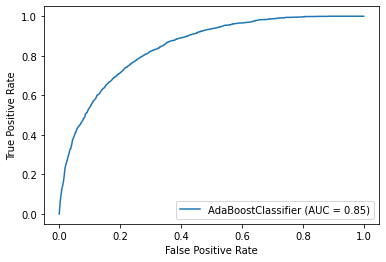

In [6]:
# these parameters were specified on by the tutorial, I should check if we have to it or not. 
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)

abc.fit(X_train, y_train)

y_pred_ada = abc.predict(X_test)
ada_probs = abc.predict_proba(X_test)
# keep probabilities for the positive outcome only
ada_probs = ada_probs[::,1]
metrics.plot_roc_curve(abc,X_test, y_test)
plt.show()

In [7]:
# data for the ROC 
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)
ada_precision, ada_recall, _ = precision_recall_curve(y_test, ada_probs)

# data for precision and recall


# Logistic regression

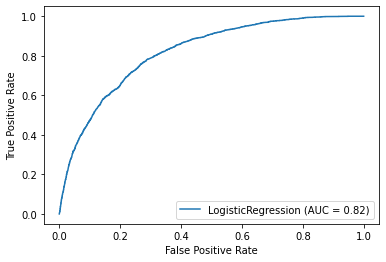

In [8]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)
log_predicted = log.predict(X_test)

log_probs = log.predict_proba(X_test)[:,1]
metrics.plot_roc_curve(log,X_test, y_test)
plt.show()


In [9]:
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
log_precision, log_recall, _ = precision_recall_curve(y_test, log_probs)

# Figures

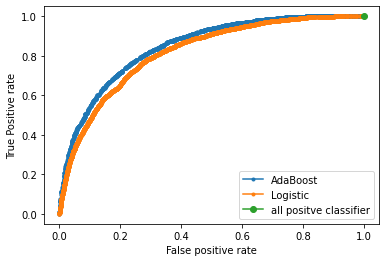

In [10]:
# These will be for plotting the ROC
plt.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost')
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic')
plt.plot(1,1,marker='o',label= 'all positve classifier')
# axis labels
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
# show the legend
plt.legend()
# show the plot
plt.show()

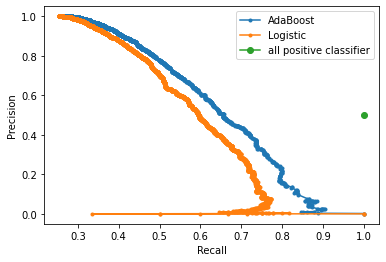

In [13]:
# graph for precision and recall
plt.plot(ada_precision, ada_recall, marker='.', label='AdaBoost')
plt.plot(log_precision, log_recall, marker='.', label='Logistic')
plt.plot(1, .5, marker='o', label='all positive classifier')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()